In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
import pandas as pd

# Load CSV data into a DataFrame
df = pd.read_csv('data_all.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())


   Unnamed: 0  age  sex  target
0           0   52    1       0
1           1   53    1       0
2           2   70    1       0
3           3   61    1       0
4           4   62    0       0


In [15]:
# Define the features and labels
X = df[['age', 'sex']]  # Features
y = df['target']  # Labels


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1236, 2)
X_test shape: (310, 2)
y_train shape: (1236,)
y_test shape: (310,)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Model 1
# Build the model
model = Sequential([
    Dense(32, input_dim=X.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5807 - loss: 0.6872 - val_accuracy: 0.5766 - val_loss: 0.6738
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5942 - loss: 0.6738 - val_accuracy: 0.5766 - val_loss: 0.6712
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6013 - loss: 0.6684 - val_accuracy: 0.5766 - val_loss: 0.6716
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6052 - loss: 0.6650 - val_accuracy: 0.5806 - val_loss: 0.6721
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5839 - loss: 0.6706 - val_accuracy: 0.5726 - val_loss: 0.6719
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5968 - loss: 0.6747 - val_accuracy: 0.5766 - val_loss: 0.6718
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6373 - loss: 0.6571 - val_accuracy: 0.5685 - val_loss: 0.6741
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5933 - loss: 0.6708 - val_accuracy: 0.5766 - val_loss: 0.6735
Ep

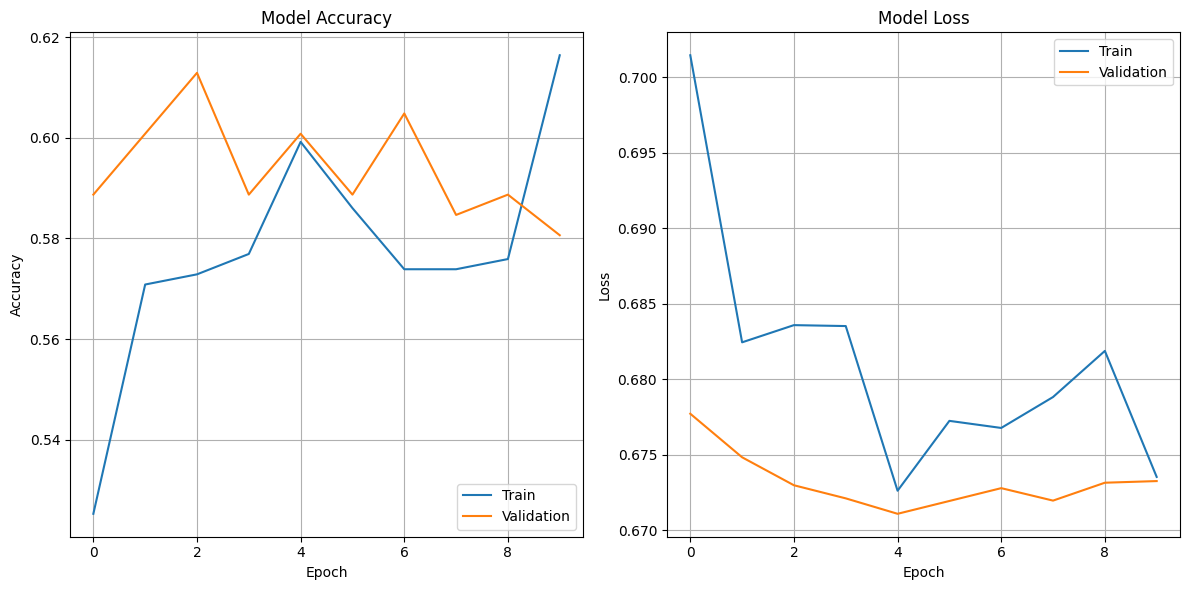

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)

plt.tight_layout()
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Model 2
# Define a more complex model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Predictions and evaluation
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5112 - loss: 0.6983 - val_accuracy: 0.5605 - val_loss: 0.6833
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5461 - loss: 0.6850 - val_accuracy: 0.5685 - val_loss: 0.6755
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5961 - loss: 0.6737 - val_accuracy: 0.5685 - val_loss: 0.6744
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6052 - loss: 0.6714 - val_accuracy: 0.5565 - val_loss: 0.6772
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5740 - loss: 0.6814 - val_accuracy: 0.5605 - val_loss: 0.6744
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6023 - loss: 0.6635 - val_accuracy: 0.5685 - val_loss: 0.6745
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6008 - loss: 0.6874 - val_accuracy: 0.5605 - val_loss: 0.6750
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6155 - loss: 0.6620 - val_accuracy: 0.5806 - val_loss:

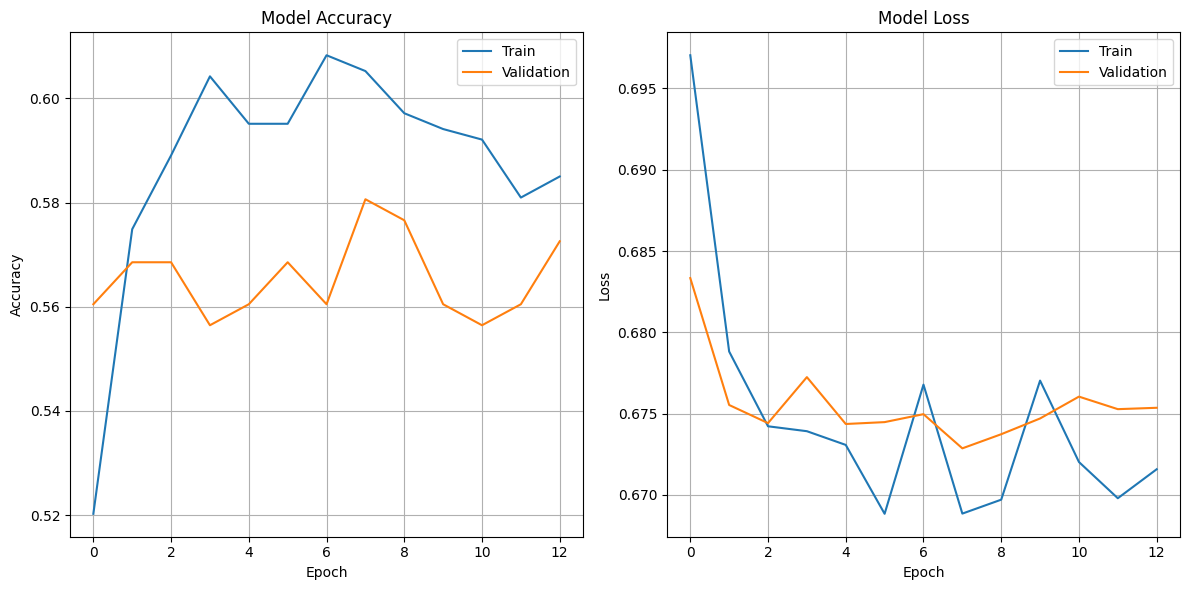

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)

plt.tight_layout()
plt.show()

**Training Performance:**
Model 1:
Accuracy improved from 0.5807 to 0.5858.
Loss improved from 0.6872 to 0.6793.

Model 2:
Accuracy improved from 0.5112 to 0.5754.
Loss improved from 0.6983 to 0.6684.

Observation: Model 2 shows a larger improvement in training accuracy and loss, which suggests that it may have learned better features despite having a higher initial loss.

**Validation Performance: **
Model 1:
Validation accuracy remained relatively stable around 0.5685.
Validation loss also remained stable around 0.6754.
Model 2:
Validation accuracy improved from 0.5605 to 0.5726.
Validation loss improved slightly from 0.6833 to 0.6754.
Observation: Model 2 shows a slight improvement in validation accuracy and loss, suggesting better generalization compared to Model 1.

**Test Performance:**
Model 1:
Test Accuracy: 0.55
Model 2:
Test Accuracy: 0.56
Observation: Model 2 has a marginally better test accuracy, indicating that it generalizes slightly better on unseen data.

**Potential Factors Influencing the Results:**
Training Epochs:
Model 1 was trained for 20 epochs, while Model 2 was trained for 50 epochs. The longer training time for Model 2 might have allowed it to learn more complex patterns, though the longer training time may cause overfitting which is not possibly happening here based on what's shown on the graph.

**Model Complexity:**
Model 1 is less complex than Model 2. Model 2 had more layers or neurons, which could contribute to better performance if the network was sufficiently regularized and the data was adequately prepared.

Learning Rate and Other Hyperparameters:
Differences in learning rate, batch size, or other hyperparameters could influence how effectively each model learns from the data.

**Regularization Techniques:**
The presence or absence of techniques like dropout or weight regularization in each model can significantly impact performance.

**Early Stopping and Overfitting:**
Model 2 showed improvement during training but still had similar final validation and test metrics as Model 1, which suggests that even with more epochs, careful monitoring is needed to avoid overfitting.


The Convolutional Neural Network (CNN) is generally a powerful model, particularly well-suited for tasks involving spatial hierarchies like image recognition. However, in this case, the low accuracy observed could indicate that the relationship between the features (X) and the target variable (Y) may be weak or not sufficiently captured by the CNN. Since CNNs excel at capturing complex patterns in high-dimensional data, their performance can be limited if the underlying data relationships are not strong or if the problem domain does not leverage their strengths. Therefore, while CNNs are effective for many applications, the weak relationship between features and target in this dataset might suggest that alternative models, such as fully connected neural networks or simpler statistical models, could be more appropriate for this specific analysis.

In [22]:
import pandas as pd

# Load CSV data into a DataFrame
df = pd.read_csv('data_first_third.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

   Unnamed: 0  age  sex  chest_pain_type  resting_bp_s  cholesterol  \
0           0   52    1                0           125          212   
1           1   53    1                0           140          203   
2           2   70    1                0           145          174   
3           3   61    1                0           148          203   
4           4   62    0                0           138          294   

   fasting_blood_sugar  restingecg  max_heart_rate  exercise_angina  oldpeak  \
0                    0           1             168                0      1.0   
1                    1           0             155                1      3.1   
2                    0           1             125                1      2.6   
3                    0           1             161                0      0.0   
4                    1           1             106                0      1.9   

   ST_slope  target  
0         2       0  
1         0       0  
2         0       0  
3   

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Sample DataFrame
df = pd.read_csv('data_first_third.csv')

# Define the target variable
y = df['target']  # Labels

# List of feature subsets to evaluate
feature_subsets = [
    ['age'],
    ['sex'],
    ['chest_pain_type'],
    ['resting_bp_s'],
    ['cholesterol'],
    ['fasting_blood_sugar'],
    ['restingecg'],
    ['max_heart_rate'],
    ['exercise_angina'],
    ['oldpeak'],
    ['ST_slope'],
]

results = []

for features in feature_subsets:
    # Define features
    X = df[features]

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the model
    model = Sequential([
        Dense(32, input_dim=X.shape[1], activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Record the results
    results.append((features, accuracy))

# Find the best feature subset
best_subset, best_accuracy = max(results, key=lambda x: x[1])
print(f'Best feature subset: {best_subset}')
print(f'Best Accuracy: {best_accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best feature subset: ['ST_slope']
Best Accuracy: 0.80


In [49]:
# Sort results by accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Extract the top two feature subsets
best_subset, best_accuracy = sorted_results[0]
second_best_subset, second_best_accuracy = sorted_results[1]

print(f'Best feature subset: {best_subset}')
print(f'Best Accuracy: {best_accuracy:.2f}')
print(f'Second best feature subset: {second_best_subset}')
print(f'Second best Accuracy: {second_best_accuracy:.2f}')

Best feature subset: ['ST_slope']
Best Accuracy: 0.80
Second best feature subset: ['chest_pain_type']
Second best Accuracy: 0.69


## Based on above analysis, 'ST_slope' would be the feature with a strongest relationship with the target.

In [54]:
# Define the features and labels
X = df[['ST_slope']]  # Features
y = df['target']  # Labels

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (838, 1)
X_test shape: (210, 1)
y_train shape: (838,)
y_test shape: (210,)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Model - ST_slope
# Build the model
model = Sequential([
    Dense(32, input_dim=X.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7843 - loss: 0.6594 - val_accuracy: 0.7738 - val_loss: 0.6331
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7926 - loss: 0.6148 - val_accuracy: 0.7738 - val_loss: 0.6042
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7653 - loss: 0.5971 - val_accuracy: 0.7738 - val_loss: 0.5844
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7858 - loss: 0.5624 - val_accuracy: 0.7738 - val_loss: 0.5724
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7899 - loss: 0.5449 - val_accuracy: 0.7738 - val_loss: 0.5674
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7911 - loss: 0.5402 - val_accuracy: 0.7738 - val_loss: 0.5660
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7856 - loss: 0.5352 - val_accuracy: 0.7738 - val_loss: 0.5658
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7747 - loss: 0.5535 - val_accuracy: 0.7738 - val_loss: 0.5655
Ep

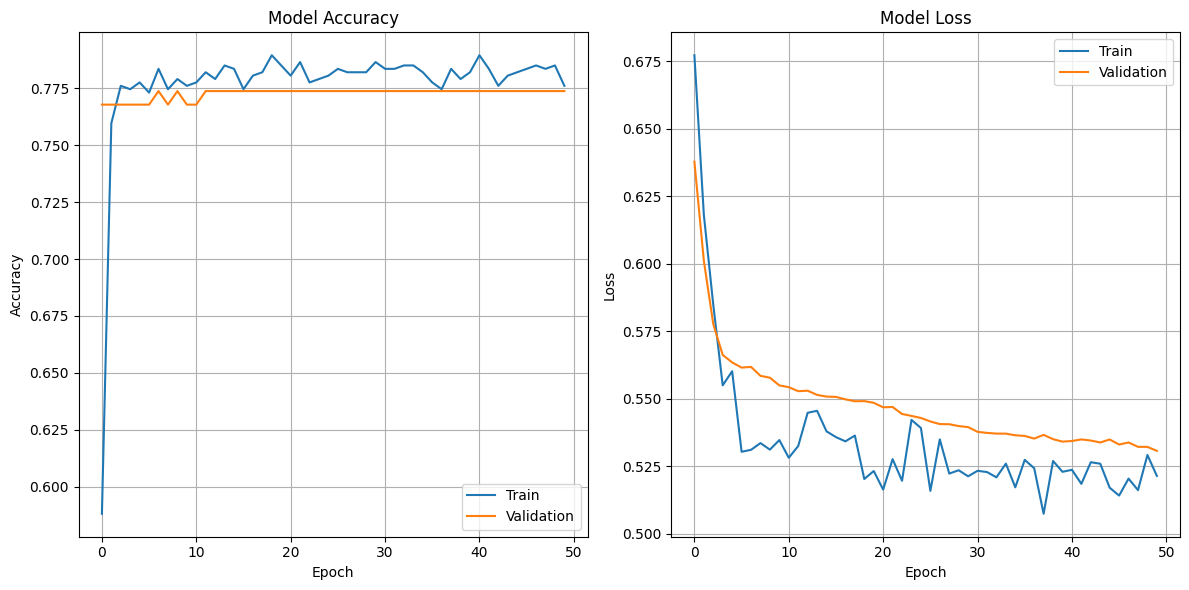

In [56]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)

plt.tight_layout()
plt.show()

## Analysis including the two most significant features

In [58]:
# Define the features and labels
X = df[['chest_pain_type', 'ST_slope']]  # Features
y = df['target']  # Labels

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (838, 2)
X_test shape: (210, 2)
y_train shape: (838,)
y_test shape: (210,)


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Model - Chest_pain_type + ST_slope
# Build the model
model = Sequential([
    Dense(32, input_dim=X.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4895 - loss: 0.7125 - val_accuracy: 0.5714 - val_loss: 0.6534
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6119 - loss: 0.6355 - val_accuracy: 0.7619 - val_loss: 0.6038
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7766 - loss: 0.5898 - val_accuracy: 0.7500 - val_loss: 0.5788
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7862 - loss: 0.5487 - val_accuracy: 0.7500 - val_loss: 0.5640
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7850 - loss: 0.5566 - val_accuracy: 0.7500 - val_loss: 0.5570
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8013 - loss: 0.5112 - val_accuracy: 0.7500 - val_loss: 0.5535
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7740 - loss: 0.5414 - val_accuracy: 0.7500 - val_loss: 0.5518
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7651 - loss: 0.5635 - val_accuracy: 0.7738 - val_loss: 0.5482
Ep

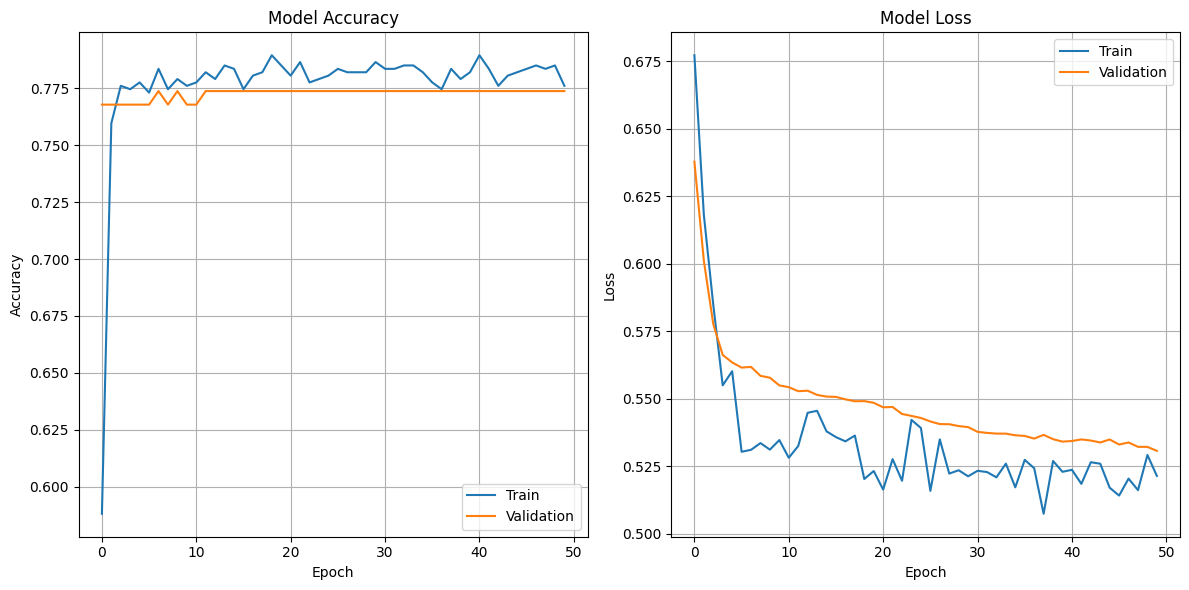

In [60]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)

plt.tight_layout()
plt.show()

# Same accuracy is obtained, implying the 'chest_pain_type' may not contribute additional valuable information or may even introduce noise that affects the model negatively. Here try building a more complex model with the feature 'ST_slope':

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6178 - loss: 0.6744 - val_accuracy: 0.7738 - val_loss: 0.6257
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7871 - loss: 0.6077 - val_accuracy: 0.7738 - val_loss: 0.5842
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7834 - loss: 0.5634 - val_accuracy: 0.7738 - val_loss: 0.5693
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8017 - loss: 0.5466 - val_accuracy: 0.7738 - val_loss: 0.5682
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7865 - loss: 0.5454 - val_accuracy: 0.7738 - val_loss: 0.5677
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7647 - loss: 0.5782 - val_accuracy: 0.7738 - val_loss: 0.5660
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7918 - loss: 0.5360 - val_accuracy: 0.7738 - val_loss: 0.5655
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7642 - loss: 0.5636 - val_accuracy: 0.7738 - val_loss: 0.5655
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[[83 22]
 [21 84]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.79      0.80      0.80       105

    accuracy                           0.80       210
   macro avg       0.80      0.80      0.80       210
weighted avg       0.80      0.80      0.80       210



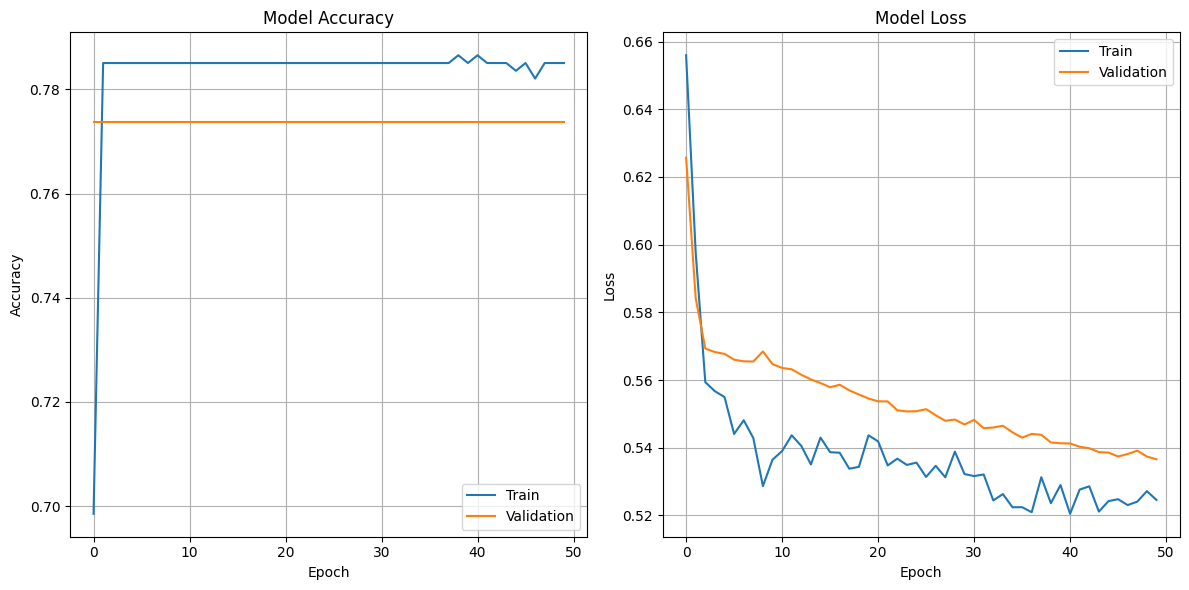

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Define the features and labels
X = df[['ST_slope']]  # Features
y = df['target']  # Labels

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Complex model - ST_slope
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Predictions and evaluation
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)

plt.tight_layout()
plt.show()

Both the simple and complex models achieve similar test accuracies of around 80%, but the complex model, with its additional layers and dropout regularization, demonstrates a more advanced architecture designed to potentially capture more intricate patterns and prevent overfitting. Despite this, the actual performance metrics are nearly identical between the two models. The simple model is quicker to train and might suffice for simpler tasks, whereas the complex model, while more resource-intensive, includes features like early stopping and dropout that could improve generalization in more complex scenarios.